In [30]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors

from googletrans import Translator
translator = Translator()
import pandas as pd

import json
import numpy as np
import time
import glob
import re

import geopandas
import seaborn as sns
%matplotlib inline

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


In [611]:
result_df['loc'].unique()#[['山东' in i for i in result_df['country'].values]]

array(['北京市', '广东省', '上海市', '浙江省', '江苏省', '贵州省', '青海省'], dtype=object)

# by geolocation correlation

# fetch all the data

In [12]:
f = open('company_link.txt').readlines()
event_company_dict = {i.split('DEEPMACRO')[0].strip():i.split('DEEPMACRO')[1].strip() for i in f}

list_data = []
for i in glob.glob('data/*'):
    #print(i)
    f = open(i).readlines()
    f = [i.strip() for i in f]
    list_data.append(f)
    
data = [item for sublist in list_data for item in sublist]

empty_list = []

country_col = []

for i in data:
    try:
        event_code = i.split('DEEPMACRO')[3]
        company_code = event_company_dict[event_code].split('/')[-1]
        #print(company_code)
        country = company_loc_dict[company_code]
        #print(country)
        country_col.append(country)
    except:
        country_col.append(np.nan)
        #if 'ipo' not in i and 'merger' not in i:
        #    print(i)
        empty_list.append(company_code)

In [14]:
result_df = pd.DataFrame(
    [i.split('DEEPMACRO') for i in data]
).iloc[:,:-1]
result_df.columns = ['title','label','date','title_url','company_desc']
result_df['country'] = country_col
result_df = result_df[[('上市' not in i) and  ('挂牌' not in i) and ('退市' not in i) for i in result_df['title']]].reset_index(
drop=True)
result_df = result_df.sort_values('date').dropna(subset=['date'])
result_df = result_df[['-' in i for i in result_df['date']]]
result_df = result_df.drop_duplicates()
#result_df  =result_df.dropna()
result_df.shape

result_df[result_df['country']=='China 中国'].set_index('title_url').shape

(5797, 5)

# Per Funding Source

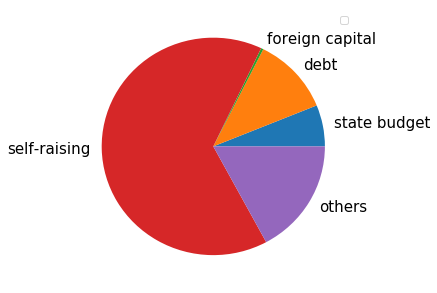

In [711]:
data = pd.read_excel('FAI_exploratory/funding.xls').iloc[2:,:2].dropna()
#data = data[data['数据库：年度数据']!='全社会固定资产投资中自筹和其他资金(亿元)']
data.index = ['state budget',
              'debt',
              'foreign capital',
              'self-raising', 
              'others']
data.iloc[:,1:].plot.pie(y='Unnamed: 1',figsize=(5, 5),
                        fontsize=15)
plt.ylabel('')
plt.legend('')

In [716]:
data.iloc[:,-1:]/data.iloc[:,-1].sum()

,Unnamed: 1
state budget,0.0615128
debt,0.114556
foreign capital,0.00340786
self-raising,0.649116
others,0.171408


# Per Industry

In [5]:
from googletrans import Translator
translator = Translator()
data = pd.read_excel('FAI_exploratory/sector.xls',index_col=[0]).iloc[3:,2:3].dropna()

In [6]:
data.index = [translator.translate(i.replace('固定资产投资(不含农户)','').replace('(亿元)',''),
                      dest='en').text for i in data.index]

In [7]:
data = data.sort_values('Unnamed: 3',ascending=False)
ax = data.plot.pie(y='Unnamed: 3',figsize=(5, 5),
                        fontsize=15,labels=['']*len(data))
plt.ylabel('')
ax.legend(labels=data.index,bbox_to_anchor=(0,1))

In [8]:
(data/data.sum()).cumsum().head()

,Unnamed: 3
manufacturing,0.182825
Real Estate,0.314771
"Water conservancy, environment and public facilities management industry",0.3923
Public Facilities,0.456758
"Transportation, storage and postal services",0.514534


# Per Geolocatoin

## NFFAI

In [89]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

coor_2_country = geopandas.read_file('chn_admbnda_adm1_ocha/chn_admbnda_adm1_ocha.shp')
coor_2_country['ADM1_EN']  = [i.replace('Province','').replace('province','').replace('Municipality',''
                                                              ).replace(
    "Special Administrative Region",
    '').replace('Uygur','').replace(
    'Hui Autonomous Region','').replace('Zhuang Autonomous Region',
                                        '').replace('Autonomous Region','').strip() for i in coor_2_country['ADM1_EN'] ]

#x = PatchCollection(Polygon(coor_2_country['geometry'][0]))
#x.set_color([1, 0, 0])

per_area = pd.DataFrame([('Beijing', 8370.44),
 ('Tianjin', 11288.92),
 ('Hebei', 33406.8),
 ('Shanxi', 6040.54),
 ('Inner Mongolia', 14013.16),
 ('Liaoning', 6676.74),
 ('Jilin', 13283.89),
 ('Heilongjiang', 11291.98),
 ('Shanghai', 7246.6),
 ('Jiangsu Province', 53277.03),
 ('Zhejiang', 31696.03),
 ('Anhui', 29275.06),
 ('Fujian Province', 26416.28),
 ('Jiangxi Province', 22085.34),
 ('Shandong', 55202.72),
 ('Henan', 44496.93),
 ('Hubei', 32282.36),
 ('Hunan', 31959.23),
 ('Guangdong', 37761.75),
 ('Guangxi', 20499.11),
 ('Hainan', 4244.4),
 ('Chongqing', 17537.05),
 ('Sichuan Province', 31902.09),
 ('Guizhou', 15503.86),
 ('Yunnan', 18935.99),
 ('Tibet', 1975.6),
 ('Shaanxi Province', 23819.38),
 ('Gansu Province', 5827.75),
 ('Qinghai', 3883.55),
 ('Ningxia', 3728.38),
 ('Xinjiang', 12089.12)])


from geopy.geocoders import Nominatim
geolocator = Nominatim()

per_area = pd.DataFrame([(geolocator.geocode(i).longitude,geolocator.geocode(i).latitude,i,j) 
              for i,j in zip(per_area[0],
                           per_area[1])])
per_area.columns = ['long','lat','city','values']
#per_area = pd.DataFrame(per_area)
#per_area.columns = ['city','values']
per_area['city']  = [i.replace('Province','').strip() for i in per_area['city'] ]
per_area = coor_2_country.set_index("ADM1_EN").join(per_area.set_index('city'))
#per_area = per_area.dropna()
#per_area['values'] = per_area['values'].fillna(0) #per_area['values'].mean()
per_area = per_area[[i not in ['Taiwan', 'Hong Kong', 'Macao'] for i  in per_area.index]]
#per_area = per_area[[i not in ['Shanghai','Beijing','Tianjin','Chongqing'] for i  in per_area.index]]

per_area.isnull().sum().sum()
per_area.head()

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:49: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


,ADM1_ZH,ADM1_PCODE,ADM0_EN,ADM0_ZH,ADM0_PCODE,geometry,long,lat,values
Anhui,å®å¾½ç,CN340,China,ä¸­å½,CN,"POLYGON ((116.935206535 34.08702338100009, 116...",117.000000,32.000000,29275.06
Anhui,å®å¾½ç,CN341,China,ä¸­å½,CN,"(POLYGON ((118.340866611 31.953676414, 118.330...",117.000000,32.000000,29275.06
Beijing,åäº¬å¸,CN110,China,ä¸­å½,CN,"POLYGON ((117.3147077560001 40.18091513900004,...",116.391276,39.906217,8370.44
Chongqing,éåºå¸,CN500,China,ä¸­å½,CN,"POLYGON ((109.5460034160001 31.72160671300003,...",106.549282,29.558571,17537.05
Fujian,ç¦å»ºç,CN350,China,ä¸­å½,CN,"(POLYGON ((117.232656503 23.63400016600008, 11...",118.351777,24.418473,26416.28


(70.4992673871501, 137.78478486985003, 16.392817257500017, 55.29986588850003)

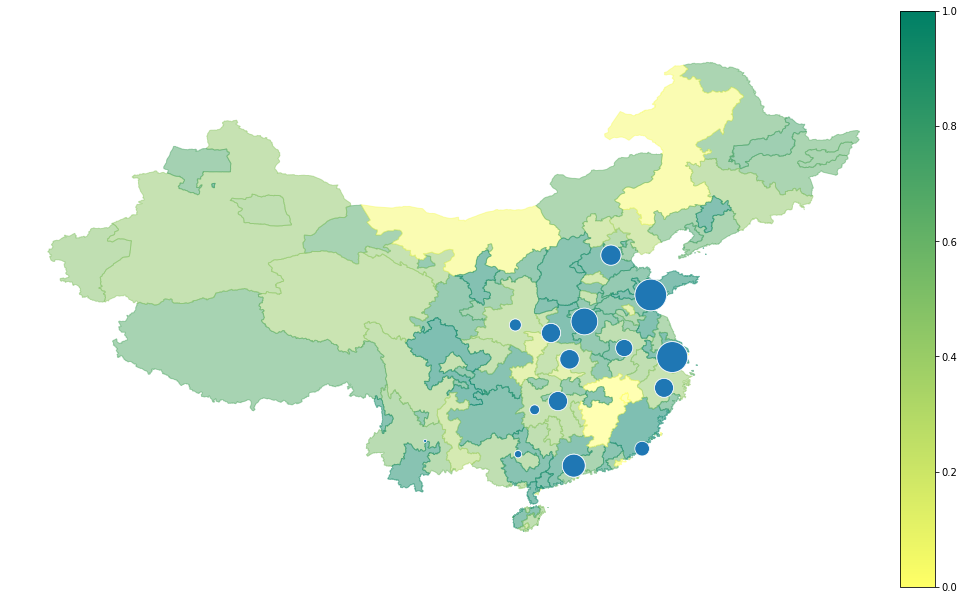

In [90]:
#coor_2_country.plot()
from geopandas.plotting import plot_polygon_collection
fig, ax = plt.subplots(figsize = (16,10))
ax.set_aspect('equal')
x = per_area['values'].astype(float).values
norm = plt.Normalize()
colors = plt.cm.summer(norm(x))
col = plot_polygon_collection(ax, per_area['geometry'],
                        edgecolor='black',facecolor=colors,alpha=0.5,
                             )

#colors = plt.cm.pink(np.linspace(0,1,len(x)))
col.set_color(colors)
sm = plt.cm.ScalarMappable(cmap='summer_r', norm=plt.Normalize(vmin=1, vmax=0))
# fake up the array of the scalar mappable. Urgh...
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)
sns.scatterplot(x="long", y="lat",size='values',#alpha = .9, #hue="values"
                     data=per_area.sort_values('values').iloc[-30:,:], 
                ax=ax,sizes=(10, 1000),palette="muted",legend=None)
#coor_2_country.plot()
ax.axis('off')

In [33]:
(per_area.ix[['Beijing',"Shanghai", "Guangdong", "Jiangsu", "Zhejiang"
]].iloc[:,-1:].drop_duplicates()/per_area.iloc[:,-1:].drop_duplicates().sum()).sum()

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


values    0.217528
dtype: float64

In [102]:
per_area.ix[['Beijing',"Shanghai", "Guangdong", "Jiangsu", "Zhejiang"
]]['values'].drop_duplicates()

Beijing       8370.44
Shanghai      7246.60
Guangdong    37761.75
Jiangsu      53277.03
Zhejiang     31696.03
Name: values, dtype: float64

## News

In [43]:
### detailed geo information

data = open('/home/jupyter/juzi/company_desc.txt').readlines()
data = [i.strip() for i in data]
print(len(data))
try:
    with open('/home/jupyter/juzi/geo_map.json') as f:
        geo_map = json.load(f)
except:
    geo_map = {}
    
print(len(geo_map))

try:
    with open('/home/jupyter/juzi/company_loc_detail_dict.json') as f:
        company_loc_detail_dict = json.load(f)
except:
    company_loc_detail_dict = {}
print(len(company_loc_detail_dict))
  
for i in data:
    if '所在城市' in i:
        city = i.split('DEEPMACRO')[-1][5:]
        #print(city)
        try:
            loc = str(geo_map[city])#.split(',')[-1].strip()
            #print(loc)
            #print(i, loc)
        except:
                translated = translator.translate(city, dest='en').text
                location = geolocator.geocode(translated)
                geo_map[city] = str(location)
                loc = str(geo_map[city])#.split(',')[-1].strip()
                #print(loc)
        company = i.split('DEEPMACRO')[0]
        company_loc_detail_dict[company] = loc

company_loc_detail_dict_io = json.dumps(company_loc_detail_dict)
f = open("/home/jupyter/juzi/company_loc_detail_dict.json","w")
f.write(company_loc_detail_dict_io)
f.close()   
print(len(company_loc_detail_dict))


f = open('company_link.txt').readlines()
event_company_dict = {i.split('DEEPMACRO')[0].strip():i.split('DEEPMACRO')[1].strip() for i in f}

list_data = []
for i in glob.glob('data/*'):
    #print(i)
    f = open(i).readlines()
    f = [i.strip() for i in f]
    list_data.append(f)
    
data = [item for sublist in list_data for item in sublist]

empty_list = []

country_col = []

for i in data:
    try:
        event_code = i.split('DEEPMACRO')[3]
        company_code = event_company_dict[event_code].split('/')[-1]
        #print(company_code)
        country = company_loc_detail_dict[company_code]
        #print(country)
        country_col.append(country)
    except:
        country_col.append(np.nan)
        #if 'ipo' not in i and 'merger' not in i:
        #    print(i)
        empty_list.append(company_code)
        
result_df = pd.DataFrame(
    [i.split('DEEPMACRO') for i in data]
).iloc[:,:-1]
result_df.columns = ['title','label','date','title_url','company_desc']
result_df['country'] = country_col
result_df = result_df[[('上市' not in i) and  ('挂牌' not in i) and ('退市' not in i) for i in result_df['title']]].reset_index(
drop=True)
result_df = result_df.sort_values('date').dropna(subset=['date'])
result_df = result_df[['-' in i for i in result_df['date']]]
result_df = result_df.drop_duplicates()
result_df = result_df.dropna()
result_df = result_df[['China 中国' in i for i in result_df['country']]]
result_df.shape

10562
305
10396
10560


(5911, 6)

In [96]:
address_list = []
for i in result_df['country']:
    a = i.split(',')[-2].strip()
    try:
        float(a)
        a = i.split(',')[-3].strip()
    except:
        pass
    address_list.append(a)
result_df['province'] = address_list
tmp = result_df.groupby(['date','province']).count()['title'].to_frame().reset_index().pivot(
index = 'date',
    columns = 'province',
    values = 'title'

)
tmp = tmp[(tmp.index>'2018-12-31') & (tmp.index<'2020-01-1')].sum().to_frame()
#tmp.index = ['Shanghai','Beijing','Guangdong','Jiangsu','Zhejiang','Guizhou','Qinghai']
#tmp = coor_2_country.set_index("ADM1_EN").join(tmp)
#tmp.isnull().sum()
#tmp = tmp.fillna(0)
tmp = pd.DataFrame([(geolocator.geocode(i).longitude,geolocator.geocode(i).latitude,i) for i in tmp.index],
            columns = ['long','lat','province']).set_index('province').join(tmp)
tmp.columns = ['long','lat','values']
#tmp.index = [translator.translate(i,dest='en').text.replace('Province',
#                                                            '').replace('Municipality',''
#                                                              ).replace(
#    "Special Administrative Region",
#    '').replace('Uygur','').replace(
#    'Hui Autonomous Region','').replace('Zhuang Autonomous Region',
#                                        '').replace('Autonomous Region','').strip() for i in tmp.index]
#tmp = coor_2_country.set_index('ADM1_EN').join(tmp)

(70.4992673871501, 137.78478486985003, 16.392817257500017, 55.29986588850003)

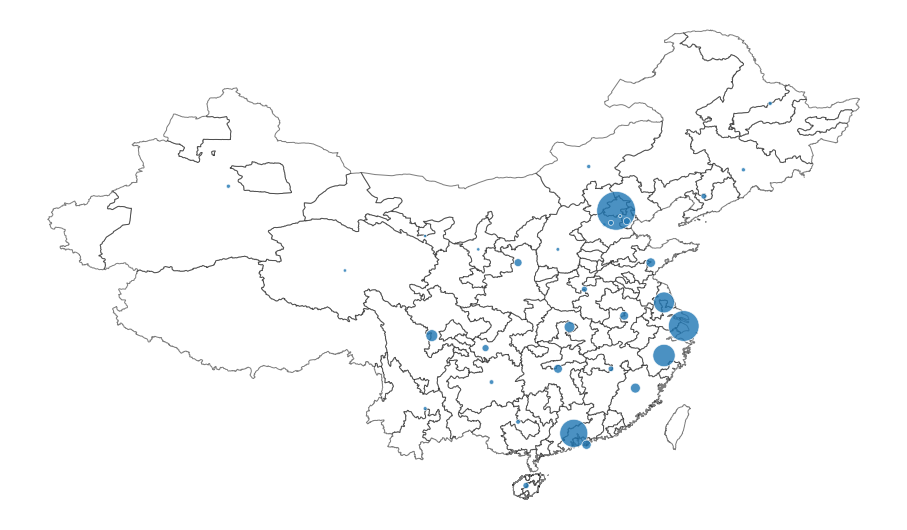

In [98]:
from geopandas.plotting import plot_polygon_collection

fig, ax = plt.subplots(figsize = (16,10))
ax.set_aspect('equal')
#x = tmp['values'].astype(float).values
#norm = plt.Normalize()
#colors = plt.cm.autumn(norm(x))
#colors = plt.cm.autumn(x)
col = plot_polygon_collection(ax, coor_2_country['geometry'],
                        edgecolor='black',facecolor='white',alpha=0.5,
                             )

#colors = plt.cm.pink(np.linspace(0,1,len(x)))
#col.set_color(colors)
#sm = plt.cm.ScalarMappable(cmap='autumn_r', norm=plt.Normalize(vmin=1, vmax=0))
# fake up the array of the scalar mappable. Urgh...
#cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
# fake up the array of the scalar mappable. Urgh...
#sm._A = []
#fig.colorbar(sm, cax=cax)
sns.scatterplot(x="long", y="lat",size='values',alpha = .8, #hue="values",
                     data=tmp, 
                ax=ax,sizes=(10, 1500),palette="muted",legend=None)
#coor_2_country.plot()
ax.axis('off')

In [67]:
tmp.index = [translator.translate(i,dest='en').text.replace('Province',
                                                            '').strip() for i in tmp.index]

In [103]:
(tmp.iloc[:,-1]/tmp.iloc[:,-1].sum()).sort_values(ascending=False)

province
北京市             0.294964
上海市             0.183562
广东省             0.153477
浙江省             0.096795
江苏省             0.084151
四川省             0.026161
湖北省             0.020929
福建省             0.017441
山东省             0.015915
香港 Hong Kong    0.015043
湖南省             0.013516
安徽省             0.013516
陕西省             0.010682
重庆市             0.007848
天津市             0.007848
海南省             0.005668
河南省             0.005232
辽宁省             0.004360
江西省             0.004360
河北省             0.003270
广西壮族自治区         0.002398
贵州省             0.002398
新疆维吾尔自治区        0.001526
吉林省             0.001526
内蒙古自治区          0.001526
黑龙江省            0.001526
云南省             0.001308
山西省             0.000872
保定市             0.000872
宁夏回族自治区         0.000436
青海省             0.000436
廊坊市             0.000218
甘肃省             0.000218
Name: values, dtype: float64